In [12]:
import pandas as pd 
import hdbscan
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


from skimage import io
%matplotlib inline
data = pd.read_csv("../cached_data/augmented.txt")
data = data.set_index("t")[["x", "y", "z"]]
data.head()

,x,y,z
t,,,
0,3.5,595.5,43.0
0,433.0,265.5,24.5
0,436.5,615.5,24.0
0,441.0,539.5,22.0
0,446.5,676.5,29.0


In [71]:
def cluster( df, cols = ["x", "y", "z"], plot=True):
    sample = df[cols][df.index==0]
    #if plot: sample.plot(kind='scatter' ,x ='x', y='y')
    X = StandardScaler().fit_transform(sample)
    db = DBSCAN(eps=0.75, min_samples=5).fit(X)
    sample["labels"] = db.labels_# = sample.join(pd.DataFrame(db.labels_, index=sample.index, columns=["labels"]))
    #return sample
    outliers = len(sample[sample["labels"]==-1])
    total = len(sample)
    if plot: sample.plot(kind='scatter',x='x', y='y', c='labels', figsize=(20,10),cmap='spectral')
    return sample.groupby("labels").count()
    return {"total": total, "outliers": outliers, "max_cluster" : sample.groupby("labels")[sample.columns[0]].count().max() }
    

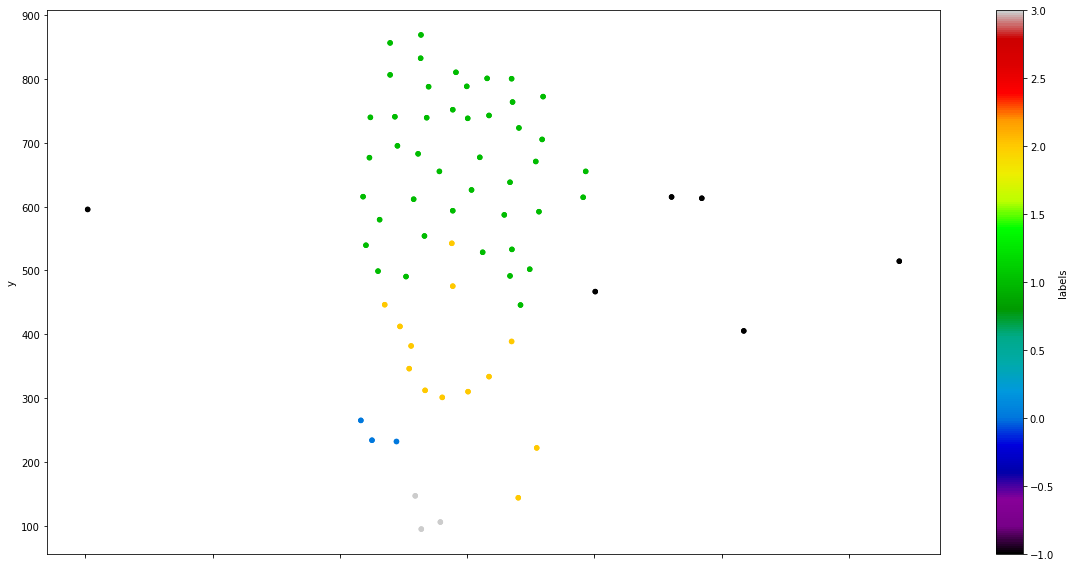

In [73]:
tst = cluster(data)

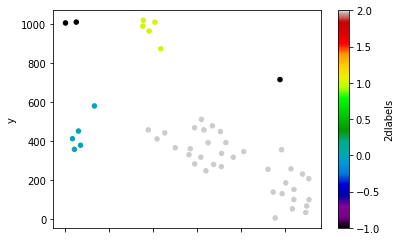

In [94]:
def mark_2d_and_3d_outliers(data, index, min_giant=5, show_outliers_of='outlier'):
    
    def set_is_giant_cluster(sam, col):
        sam[col+"_isGiant"] = 0
        grp = sam.groupby(col).count()
        arg_max = grp.sort_values("x").tail(1).index.values[0]
        sam.loc[sam[col]==arg_max, col+"_isGiant"] = 1
        
        
    sample = data[["x", "y"]][data.index == index]  
    X = StandardScaler().fit_transform(sample)
    db = DBSCAN(eps=0.75, min_samples=5).fit(X)
    S = pd.Series(db.labels_, index=sample.index)
    if len(S.unique())==1: S = 0 #no clusters
        
    sample = data[["x", "y", "z"]][data.index == index]  
    X = StandardScaler().fit_transform(sample)
    db = DBSCAN(eps=0.75, min_samples=5).fit(X)
    sample["3dlabels"] = db.labels_
    if len(sample["3dlabels"].unique())==1: sample["3dlabels"] = 0 #no clusters
        
    sample["2dlabels"] = S  
    sample["outlier"] = 0
    sample.loc[(sample["2dlabels"]==-1)&(sample["3dlabels"]==-1), "outlier"] = 1
    
    #add is_2d giant cluster and is 3d giant cluster
    set_is_giant_cluster(sample, "2dlabels")
    set_is_giant_cluster(sample, "3dlabels")
    
    sample.plot(kind='scatter', x='x', y='y', c=show_outliers_of, cmap='spectral')
    return sample

res = mark_2d_and_3d_outliers(data, 50, show_outliers_of='2dlabels')
        
        
    
    